In [1]:
import torch
import davinci_model
import numpy as np
from davinci_utils import normalize2
import matplotlib.pyplot as plt

# Trajectory Generation Function

In [4]:
def generate_and_plot_trajectories(model, num_trajectories=12, fixed_latents=None, figsize=(30, 20)):
    """
    Generate and plot trajectories from the model's decoder.

    Parameters:
    model: The trained Davinci model
    num_trajectories: The number of trajectories to generate (default is 12).
    fixed_latents: A list of dictionaries with fixed latent values for specific trajectories.
                   Example: [{1: 0, 11: 0}, {2: -3}] will fix latent variables 1 and 11 to 0 for the first trajectory,
                   and latent variable 2 to -3 for the second trajectory.
    figsize: A tuple specifying the size of the figure (default is (30, 20)).

    Returns:
    dec: Numpy array of all generated trajectories.
    """
    torch.manual_seed(490)
    with torch.no_grad():
        en = torch.randn(num_trajectories, model.latent_space)
        
        if fixed_latents:
            for idx, latents in enumerate(fixed_latents):
                for latent_idx, value in latents.items():
                    en[idx, latent_idx] = value
        
        dec = model.decoder(en).numpy().reshape(num_trajectories, 200)
        dec = normalize2(dec)
    
    # Plotting the first 20 trajectories
    num_plots = min(num_trajectories, 20)
    cols = 3
    rows = (num_plots + cols - 1) // cols
    
    plt.figure(figsize=figsize)
    
    for i in range(num_plots):  
        plt.subplot(rows, cols, i + 1)
        plt.plot(dec[i])
        plt.xlabel('Time Frame')
        plt.ylabel('Normalized Position')
        plt.title(f'Trajectory {i+1}')
    
    
    plt.show()
    
    return dec

# Load Model

In [7]:
device = 'cpu'
model = davinci_model.TransformerVAE(device=device).to(device)
model.load_model('DavinciModel')

model loaded


# Generate Trajectories

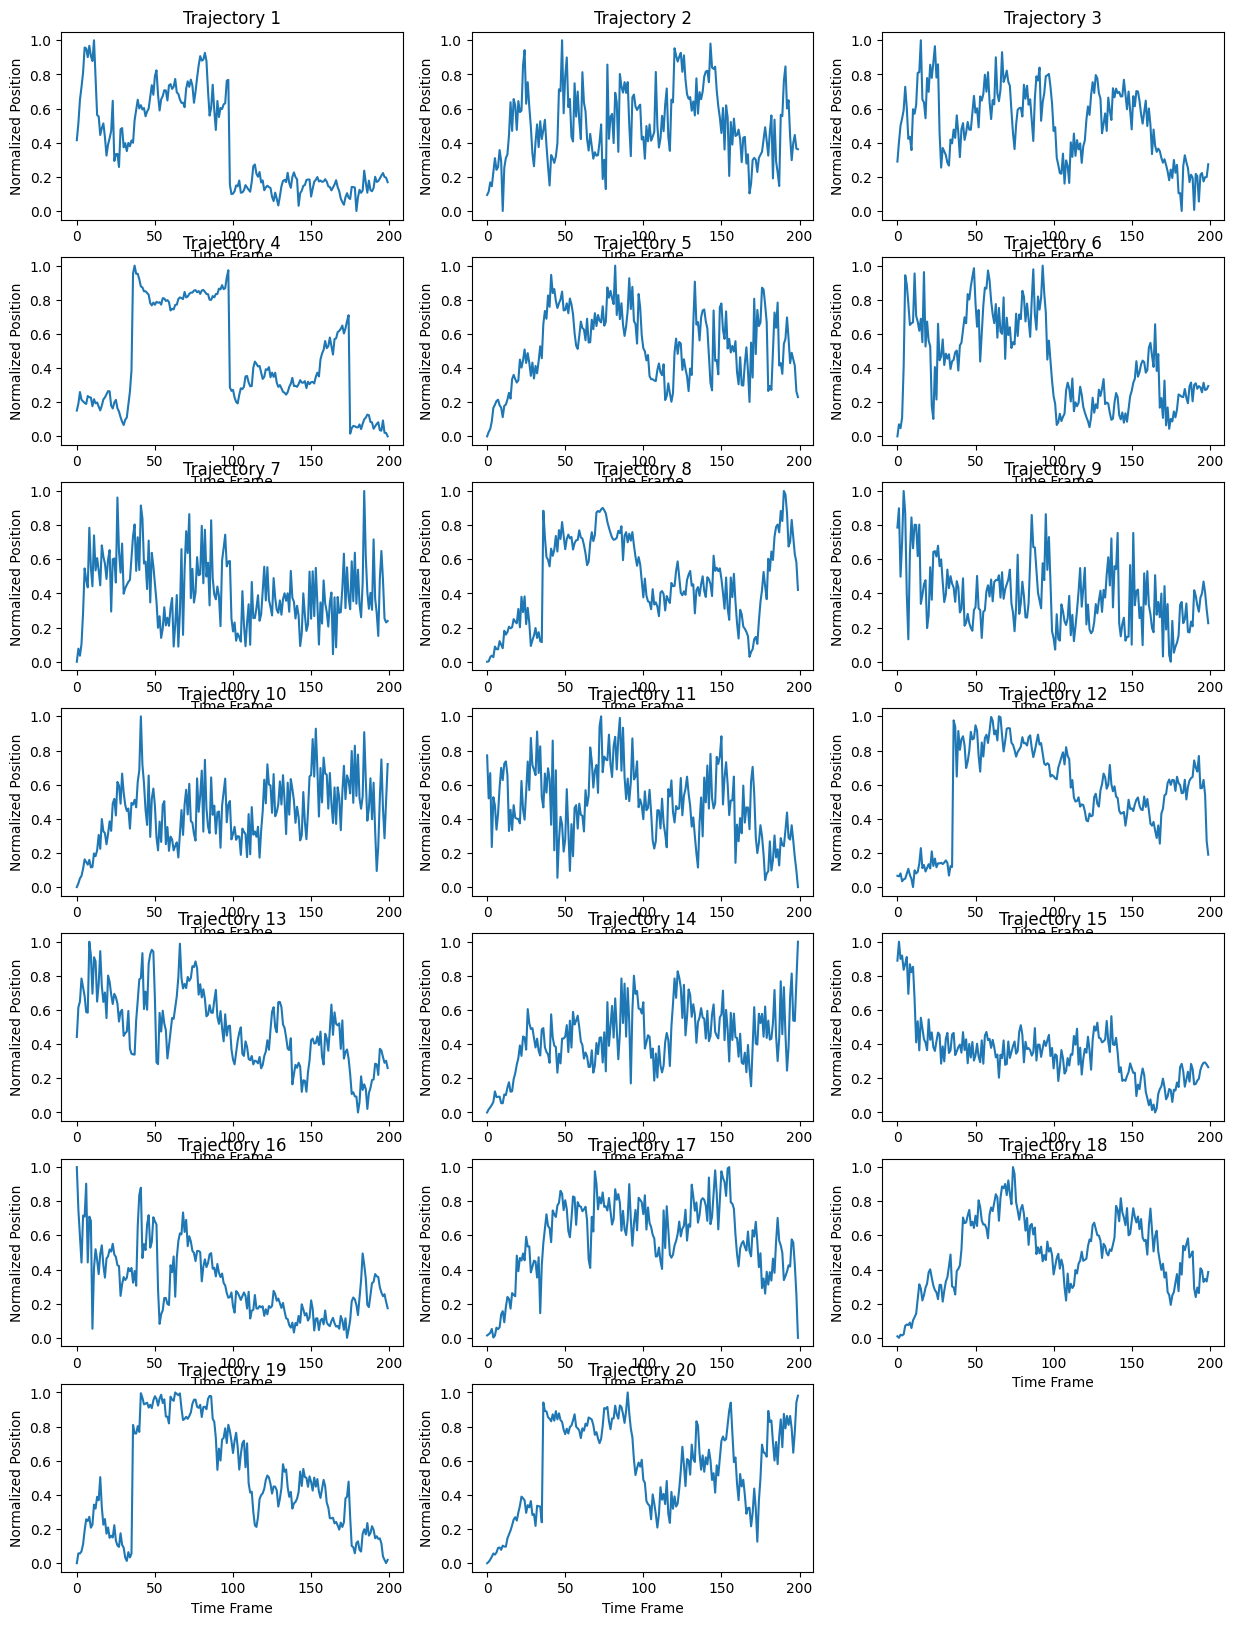

In [10]:
# Generate trajectories with random values of latent variables
generated_trajectories = generate_and_plot_trajectories(model, num_trajectories=25, figsize=(15, 20))